<a href="https://colab.research.google.com/github/rponte92/sigmoidal_data_science/blob/main/Analisando_os_Dados_do_Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**. Com um detalhe importante: ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem possível.

No final de 2018, a Startup fundada 10 anos atrás já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes a Paris, a "Cidade Luz", e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Nesse site, os dados do Airbnb de diversas outras cidades ao redor do mundo são fornecidos.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

`listings.csv` - *Summary information and metrics for listings in Paris (good for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df_city=pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews que a propriedade possui nos últimos 12 meses
* `license` - número de licença ou registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df_city.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,102,2,273,2021-12-08,1.80,1,58,42,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,112,10,288,2021-12-05,2.22,2,209,19,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,344,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,117,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86373,2.37093,Entire home/apt,81,4,33,2021-10-22,0.31,1,260,7,7511101582862


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Iniciamos nossa análise verificando as quantidades de linhas e colunas de nosso *dataset*, bem como os tipos de cada coluna. 

Ao rodar o código abaixo, percebemos que, à exceção de `id` e `host_id`, cada coluna tem tipo coerente com a informação que ela expressa. 

As duas colunas citadas, por terem dados categóricos, ficariam mais adequadas caso tivessem o tipo `object`, por isso converteremos o tipo delas. 

In [4]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df_city.shape[0]}')
print(f'Variáveis: {df_city.shape[1]}')
# verificar os tipos das entradas do dataset
df_city.dtypes

Entradas: 49429
Variáveis: 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
# convertendo o tipo de `id` e `host_id`
df_city[['id', 'host_id']]=df_city[['id', 'host_id']].astype(object)
# verificando os tipos das entradas após a conversão
df_city.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Agora, verificaremos a porcentagem de dados ausentes em cada coluna. Uma coluna com alta porcentagem de dados ausentes pode ser inviável para as nossas análises.

Executando o código abaixo, percebemos que:

* a coluna `neighbourhood_group` possui 100% dos seus valores faltantes; 
* a variável `license` tem 43% de dados ausentes;
* as variáveis `reviews_per_month` e `last_review` possuem valores nulos em 21,6% das linhas, aproximadamente;
* as variáveis `name` e `host_name` têm mais de 99,9% de seus valores preenchidos.

Dessa forma, removeremos a coluna `neighbourhood_group` do nosso *dataset*.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_city.isnull().sum()).sort_values(ascending=False) / len(df_city)

neighbourhood_group               1.000000
license                           0.431063
reviews_per_month                 0.215703
last_review                       0.215703
name                              0.000910
host_name                         0.000647
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [7]:
# removendo neighbourhood_group do dataset
df_city.drop(['neighbourhood_group'], axis=1, inplace=True)

### **Q3. Qual o tipo de distribuição das variáveis?** 

Podemos fazer uma avaliação rápida de como os dados se distribuem plotando os histogramas das variáveis numéricas do *dataset*. 

Nessa etapa conseguimos, por exemplo, identificar possíveis colunas em que temos *outliers*.

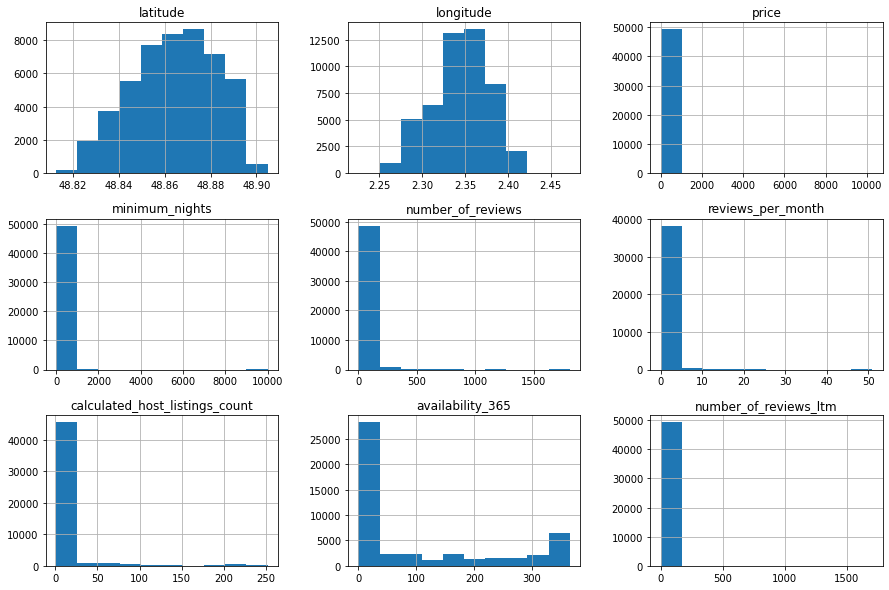

In [8]:
# plotar o histograma das variáveis numéricas
df_city.hist(figsize=(15,10));

### **Q4. Como lidar com os *outliers*?**

A partir dos histogramas acima, notamos que diversas colunas parecem ter *outliers*; entre elas, `price` e `minimum_nights`. 

Mostraremos uma forma de tratar esses valores, a fim de tornar nosso conjunto de dados mais homogêneo.

Para termos uma visão estatística mais geral dos dados, usaremos o método `describe()` e, em seguida, plotaremos *boxplots* para as colunas supracitadas.

In [9]:
# descrição estatística do dataset
df_city_num = df_city[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',	'calculated_host_listings_count', 'availability_365',	'number_of_reviews_ltm']]
df_city_num.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,49429.000000,49429.000000,49429.000000,38767.000000,49429.000000,49429.000000,49429.000000
mean,129.891986,109.405086,21.636590,0.796471,10.652188,99.513059,3.635801
std,217.186069,168.774442,46.339395,1.191827,35.528471,134.092923,13.033774
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,61.000000,2.000000,1.000000,0.120000,1.000000,0.000000,0.000000
50%,90.000000,4.000000,6.000000,0.370000,1.000000,3.000000,0.000000
75%,140.000000,365.000000,21.000000,1.000000,2.000000,198.000000,3.000000
max,10250.000000,9999.000000,1809.000000,50.860000,252.000000,365.000000,1705.000000


Pelo resumo acima, observamos:

* Existem linhas de `price` com valor 0, denotando *outliers* inferiores;
* 75% dos valores de `price` estão abaixo de 140, mas o valor máximo é 10250, aproximadamente 73,2 vezes maior;
* 75% dos valores de `minimum_nights` estão abaixo de 365, mas o valor máximo é 9999, resultando em mais de 27 anos de período mínimo.

#### Boxplot para minimum_nights

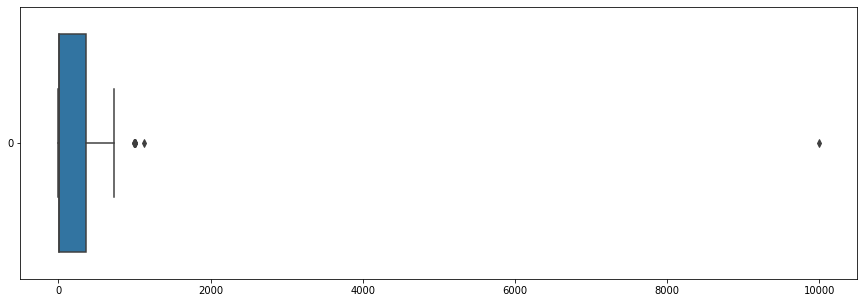

In [ ]:
# minimum_nights
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(orient='h', data=df_city['minimum_nights'], ax=ax)
plt.show()

Escolheremos 30 dias como o valor de corte para os *outliers* superiores de `minimum_nights`, uma vez que Paris é uma cidade eminentemente turística, e o Airbnb ser muito utilizado por esse grupo de pessoas. Percebemos que 30,13% das entradas se encontram acima do valor de corte, o que é uma grande parcela.

In [10]:
# ver quantidade de valores acima de 30 dias para minimum_nights
upper_mn = (df_city.minimum_nights > 30).sum()
print(f'Valores acima de 30 dias em minimum_nights: {upper_mn}')
print(f'Em porcentagem, isso corresponde a {round(upper_mn * 100/len(df_city), 2)}% dos dados')

Valores acima de 30 dias em minimum_nights: 14895
Em porcentagem, isso corresponde a 30.13% dos dados


Contudo, verificamos que 28,52% das entradas têm `minimum_nights` igual a 365, e portanto apenas 1.61% dos valores de `minimum_nights` são maiores que 30 e diferentes de 365. 

Dessa forma, separaremos os dados a serem analisados em dois *clusters*: um com `minimum_nights` abaixo de 31 dias (**Dataset I**) e outro com `minimum_nights` igual a 365 dias (**Dataset II**). O primeiro concentra as hospedagens com fins turísticos, enquanto o segundo reúne as hospedagens mais voltadas para moradias permanentes.

In [11]:
# ver quantidade de valores com 365 dias para minimum_nights
val_365 = (df_city.minimum_nights == 365).sum()
print(f'Valores iguais a 365 em minimum_nights: {val_365}')
print(f'Em porcentagem, isso corresponde a {round(val_365 * 100/len(df_city), 2)}% dos dados')

Valores iguais a 365 em minimum_nights: 14098
Em porcentagem, isso corresponde a 28.52% dos dados


In [12]:
# separando os datasets  por faixa de dias
df_city30=df_city[df_city['minimum_nights'] < 31].copy()
df_city30.reset_index(drop=True, inplace=True)
df_city365=df_city[df_city['minimum_nights'] == 365].copy()
df_city365.drop('minimum_nights', axis=1, inplace=True)
df_city365.reset_index(drop=True, inplace=True)


Refaremos o resumo estatístico para os dois *clusters*, mas apenas para a coluna `price` dessa vez. Percebemos que as distribuições guardam alguma semelhança, mas trataremo-las separadamente.

In [13]:
df_city30.price.describe()

count    34534.000000
mean       140.823420
std        211.939769
min          0.000000
25%         66.000000
50%         99.000000
75%        154.000000
max       9280.000000
Name: price, dtype: float64

In [14]:
df_city365.price.describe()

count    14098.000000
mean       102.370123
std        215.386704
min          0.000000
25%         57.000000
50%         75.000000
75%        100.000000
max      10250.000000
Name: price, dtype: float64

###Boxplot para price

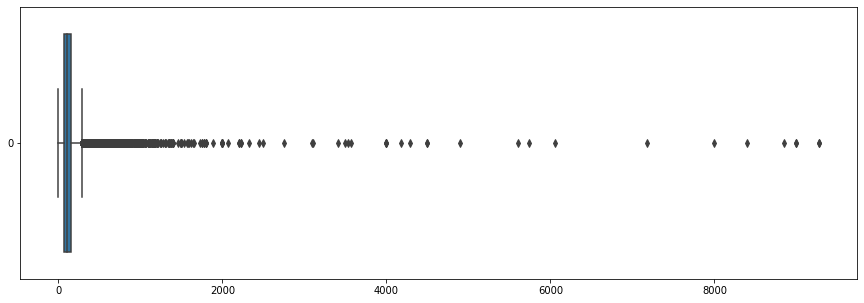

In [15]:
#price for df_city30
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(orient='h', data=df_city30['price'], ax=ax)
plt.show()

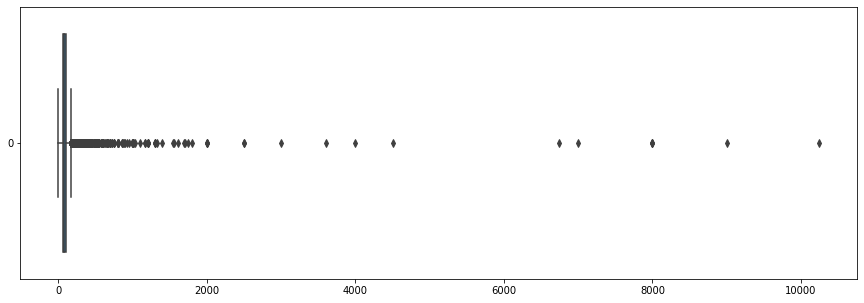

In [16]:
#price for df_city365
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(orient='h', data=df_city365['price'], ax=ax)
plt.show()

Para essa coluna, usaremos a conhecida fórmula estatística para determinar o limite superior da amostra:

$$
\normalsize UL = Q_3 + 1.5 \times (Q_3 - Q_1),
$$

sendo $UL$ o limite superior, $Q_1$ e o primeiro quartil e $Q_3$ o terceiro quartil.

Para o limite inferior, eliminaremos todas as entradas com valor zero.

In [17]:
upper_lim_30p = df_city30['price'].quantile(.75) + 1.5*(df_city30['price'].quantile(.75) - df_city30['price'].quantile(.25)) 
quantity_upper_30p = (df_city30['price'] > upper_lim_30p).sum()
quantity_lower_30p = (df_city30['price'] == 0).sum()
upper_lim_365p = df_city365['price'].quantile(.75) + 1.5*(df_city365['price'].quantile(.75) - df_city365['price'].quantile(.25))
quantity_upper_365p = (df_city365['price'] > upper_lim_365p).sum()
quantity_lower_365p = (df_city365['price'] == 0).sum()

In [18]:
print(f'Sobre o Dataset I:')
print(f'Valores iguais a zero ou acima de {upper_lim_30p} em price: {quantity_upper_30p + quantity_lower_30p}.')
print(f'Em porcentagem, isso corresponde a {round((quantity_upper_30p + quantity_lower_30p) * 100/len(df_city30), 2)}% dos dados.')
print(f'Sobre o Dataset II:')
print(f'Valores iguais a zero ou acima de {upper_lim_365p} em price: {quantity_upper_365p + quantity_lower_365p}.')
print(f'Em porcentagem, isso corresponde a {round((quantity_upper_365p + quantity_lower_365p) * 100/len(df_city365), 2)}% dos dados.')

Sobre o Dataset I:
Valores iguais a zero ou acima de 286.0 em price: 2849.
Em porcentagem, isso corresponde a 8.25% dos dados.
Sobre o Dataset II:
Valores iguais a zero ou acima de 164.5 em price: 1271.
Em porcentagem, isso corresponde a 9.02% dos dados.


Pelo que foi feito acima, excluiremos as entradas classificadas como *outliers* dos *datasets*. 

In [19]:
df_clean30=df_city30.copy()
df_clean365=df_city365.copy()
# excluindo os outliers de df_city30
df_clean30 = df_clean30[df_clean30['price'].apply(lambda x : (x>0) & (x <= upper_lim_30p))]
df_clean30.reset_index(drop=True, inplace=True)
# excluindo os outliers de df_city365
df_clean365 = df_clean365[df_clean365['price'].apply(lambda x : (x>0) & (x <= upper_lim_365p))]
df_clean365.reset_index(drop=True, inplace=True)

Quanto aos *outliers*, é importante entendermos as possíveis razões pelas quais eles aparecem. 

Nesse caso, devemos ter em mente que Paris é um destino bastante visado por turistas de alto poder aquisitivo; por essa razão, é natural que algumas locações do Airbnb sejam bastante caras, e que essas sejam minoria dentre as opções disponíveis no *site*. Abaixo veremos alguns exemplos de tais entradas. 

Há também a possibilidade de termos a coluna `price` preenchida com o valor mensal em vez do valor por diária. Mais geralmente, podemos ter algumas entradas erroneamente preenchidas, por qualquer outra razão. 

Por isso, excluímos as entradas que classificamos como *outliers*, a fim de gerarmos um conjunto de dados mais homogêneo.

In [20]:
# exemplo de outlier em df_city30
df_city30.loc[1858, ['name', 'price']]

name     LUXURY APPARTMENT 220m2 Champs-Élysées,Montaigne
price                                                2450
Name: 1858, dtype: object

In [21]:
# exemplo de outlier em df_city30
df_city365.loc[10833,['name', 'price']]

name     Amazing High luxury 6p In paris
price                               1200
Name: 10833, dtype: object

#### Histogramas e estatísticas sem *outliers*

Após a remoção dos *outliers* das colunas `minimum_nights` e `price`, plotamos os histogramas relativos às colunas do dataset sem outliers.

Percebemos, em ambos os datasets, que a coluna `price` tem distribuições bem menos concentradas.

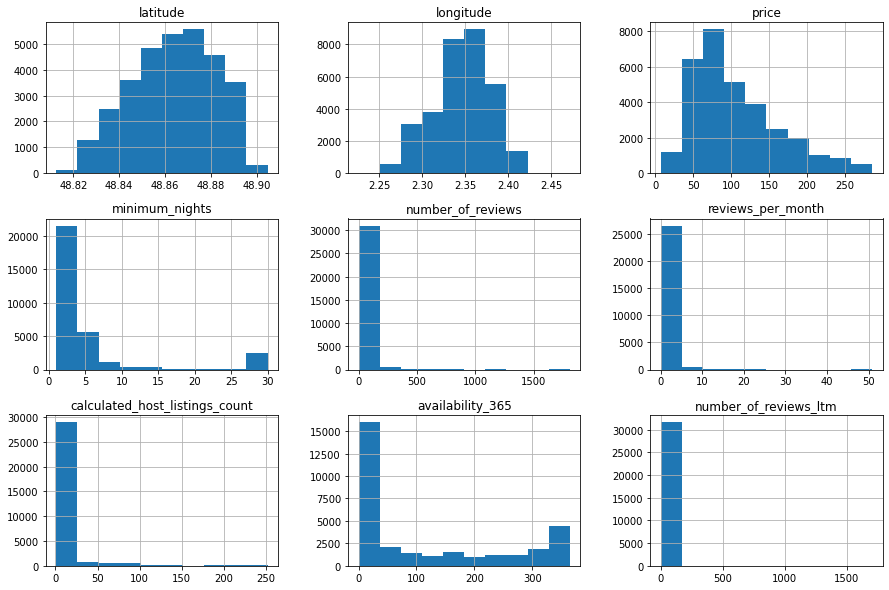

In [22]:
# histogramas sem outliers para df_clean30
df_clean30.hist(figsize=(15, 10)); 

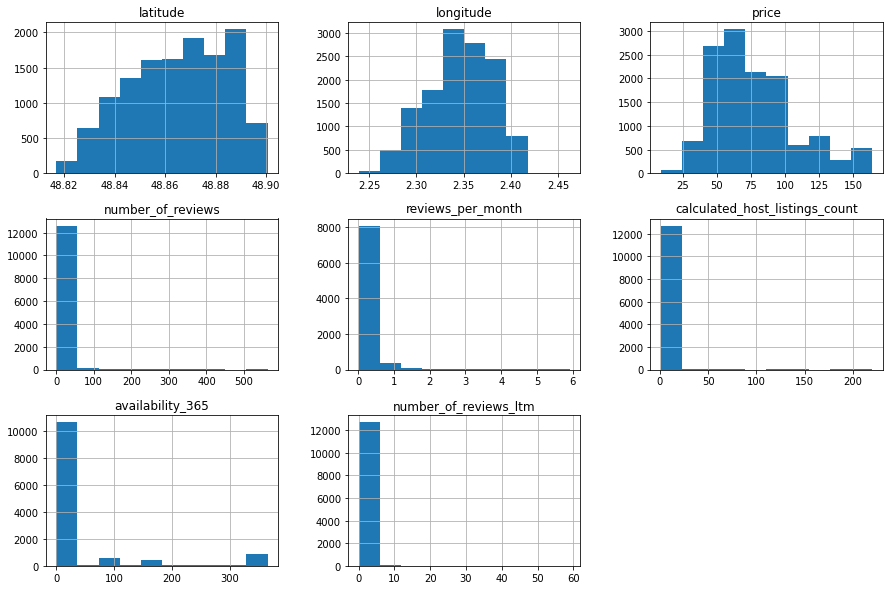

In [23]:
# histogramas sem outliers para df_clean365
df_clean365.hist(figsize=(15, 10)); 

Adicionamos também as distribuições estatísticas de cada um dos *datasets* para a coluna `price`. Notamos a clara diminuição do desvio padrão e a aproximação entre média e mediana. 

In [24]:
# dataset I limpo
df_clean30.price.describe()

count    31685.000000
mean       106.206344
std         57.139646
min          7.000000
25%         65.000000
50%         92.000000
75%        136.000000
max        286.000000
Name: price, dtype: float64

In [25]:
# dataset II limpo
df_clean365.price.describe()

count    12827.000000
mean        77.391674
std         30.010610
min          9.000000
25%         55.000000
50%         70.000000
75%         95.000000
max        164.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis?**

Para cada um dos *datasets* analisados, analisaremos a correlação entre as variáveis envolvidas. Dessa forma, poderemos detectar possíveis relações entre elas, o que nos facilitaria, por exemplo, na construção de modelos preditivos.

De um modo geral, olhando as matrizes abaixo, temos baixa correlação entre os pares de variáveis (com exceção, por exemplo, das colunas relacionadas ao número de *reviews*, em que já esperamos que haja relação entre essas variáveis).

In [26]:
# criar uma matriz de correlação
num_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',	'calculated_host_listings_count', 
               'availability_365',	'number_of_reviews_ltm']
df_30corr = df_clean30[num_columns].corr()
df_365corr = df_clean365[['price', 'number_of_reviews', 'reviews_per_month',	'calculated_host_listings_count', 'availability_365',	
                         'number_of_reviews_ltm']].corr()

In [27]:
# mostrar a matriz de correlação de df_clean30
df_30corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.081789,0.019847,0.086470,0.187309,0.339412,0.064696
minimum_nights,-0.081789,1.000000,-0.073971,-0.147647,0.173086,0.083417,-0.105716
number_of_reviews,0.019847,-0.073971,1.000000,0.580844,-0.049485,0.132375,0.535132
reviews_per_month,0.086470,-0.147647,0.580844,1.000000,0.056387,0.255431,0.701134
calculated_host_listings_count,0.187309,0.173086,-0.049485,0.056387,1.000000,0.195909,0.027445
availability_365,0.339412,0.083417,0.132375,0.255431,0.195909,1.000000,0.159945
number_of_reviews_ltm,0.064696,-0.105716,0.535132,0.701134,0.027445,0.159945,1.000000


In [28]:
# mostrar a matriz de correlação de df_clean365
df_365corr

,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.024441,0.085263,0.102294,0.168003,0.023513
number_of_reviews,0.024441,1.000000,0.862653,0.032517,0.187364,0.287857
reviews_per_month,0.085263,0.862653,1.000000,0.202410,0.243253,0.501191
calculated_host_listings_count,0.102294,0.032517,0.202410,1.000000,0.158851,0.372038
availability_365,0.168003,0.187364,0.243253,0.158851,1.000000,0.134460
number_of_reviews_ltm,0.023513,0.287857,0.501191,0.372038,0.134460,1.000000


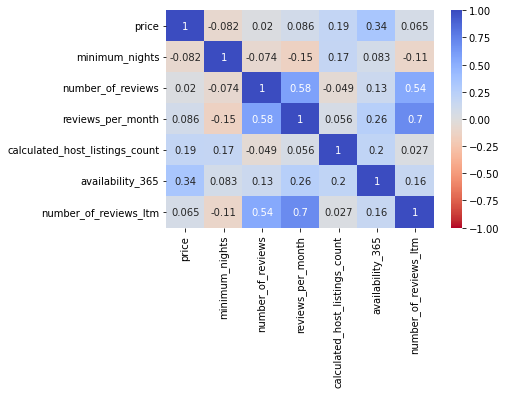

In [29]:
# plotar um heatmap de df_city30 a partir das correlações
sns.heatmap(df_30corr, cmap='coolwarm_r', annot=True, vmin = -1, vmax = 1);

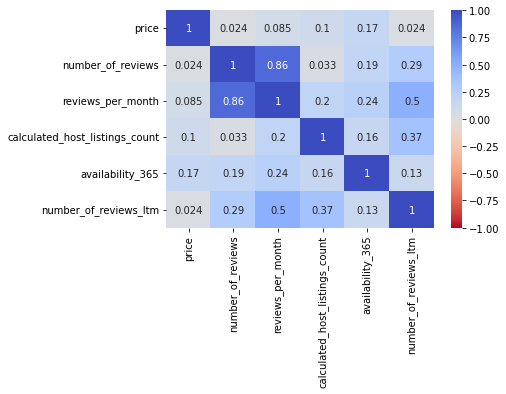

In [30]:
# plotar um heatmap de df_city365 a partir das correlações
sns.heatmap(df_365corr, cmap='coolwarm_r', annot=True, vmin = -1, vmax = 1);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação anunciada no Airbnb. Dentre as opções disponíveis, existem apartamentos/casas inteiras, quartos de hotel, apenas o aluguel de um quarto, ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel usando o método `value_counts()`.

In [32]:
# mostrar a quantidade de cada tipo de imóvel disponível no dataset I
df_clean30['room_type'].value_counts()

Entire home/apt    23972
Private room        6630
Hotel room           771
Shared room          312
Name: room_type, dtype: int64

In [33]:
# mostrar a porcentagem de cada tipo de imóvel disponível no dataset I
df_clean30['room_type'].value_counts() / len (df_clean30)

Entire home/apt    0.756573
Private room       0.209247
Hotel room         0.024333
Shared room        0.009847
Name: room_type, dtype: float64

In [34]:
# mostrar a porcentagem de cada tipo de imóvel disponível no dataset II
df_clean365['room_type'].value_counts()

Entire home/apt    12806
Hotel room            17
Private room           3
Shared room            1
Name: room_type, dtype: int64

In [35]:
# mostrar a porcentagem de cada tipo de imóvel disponível no dataset II
df_clean365['room_type'].value_counts() / len (df_clean365)

Entire home/apt    0.998363
Hotel room         0.001325
Private room       0.000234
Shared room        0.000078
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Usando o método `groupby()`, listaremos os preços médios das locações por bairro de Paris. Em ambas as distribuições, notamos que a ordem dos bairros por preço é essencialmente igual. 

Além disso, temos que os bairros mais caros são os mais próximos ao centro de Paris, na região mais turística da cidade. Portanto, os dados são coerentes com a percepção que temos da cidade.



In [36]:
# ver preços por bairros, na média, do dataset I
df_clean30.groupby('neighbourhood').mean()['price'].sort_values(ascending=False)

neighbourhood
Élysée                 142.784038
Louvre                 141.212976
Hôtel-de-Ville         134.507519
Temple                 133.637661
Bourse                 133.273113
Palais-Bourbon         132.583441
Luxembourg             131.832101
Panthéon               125.109495
Passy                  123.958874
Opéra                  121.937575
Batignolles-Monceau    104.434853
Vaugirard              102.714767
Entrepôt               101.715768
Popincourt              96.762386
Observatoire            93.920410
Reuilly                 91.462465
Buttes-Montmartre       89.644893
Gobelins                86.125105
Buttes-Chaumont         76.572372
Ménilmontant            75.234802
Name: price, dtype: float64

In [37]:
# ver preços por bairros, na média, do dataset II
df_clean365.groupby('neighbourhood').mean()['price'].sort_values(ascending=False)

neighbourhood
Louvre                 93.410959
Hôtel-de-Ville         91.866412
Luxembourg             89.827731
Élysée                 89.253394
Palais-Bourbon         89.179310
Bourse                 88.870968
Temple                 87.515152
Passy                  84.921405
Opéra                  84.026230
Panthéon               83.152174
Vaugirard              81.986965
Entrepôt               78.583614
Observatoire           76.528846
Batignolles-Monceau    75.845294
Popincourt             74.295438
Reuilly                73.132013
Gobelins               70.541152
Buttes-Montmartre      70.276163
Buttes-Chaumont        69.832536
Ménilmontant           67.157770
Name: price, dtype: float64

Plotaremos também a localização dos dados em um gráfico de dispersão, usando as colunas `latitude` e `longitude`. 

Notamos no Dataset I, por exemplo, que as locações mais caras estão mais próximas do Rio Sena (a faixa branca perto do mapa), enquanto as locações mais à periferia da cidade são mais baratas. No Dasaset II, as locações parecem mais uniformemente distribuídas em relação ao preço. 

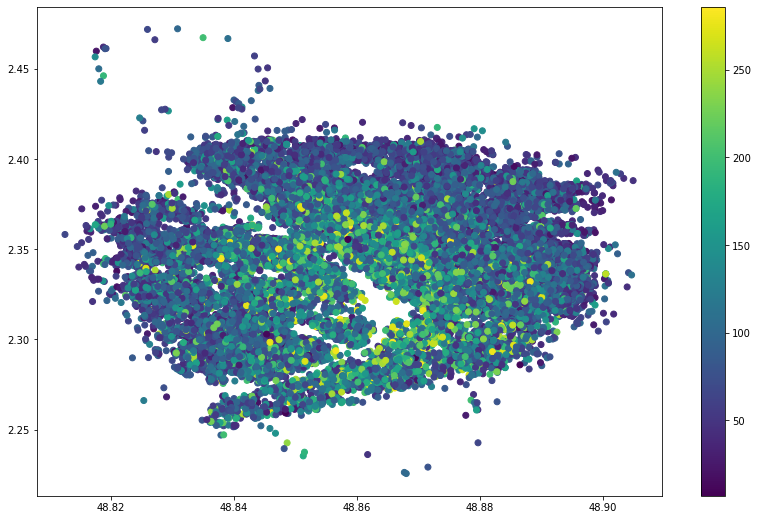

In [38]:
# plotar os imóveis pela latitude-longitude no dataset I
fig, ax = plt.subplots(figsize=(14,9))
mapa = ax.scatter(x='latitude', y='longitude', c='price', data=df_clean30)
fig.colorbar(mapa)
plt.show()

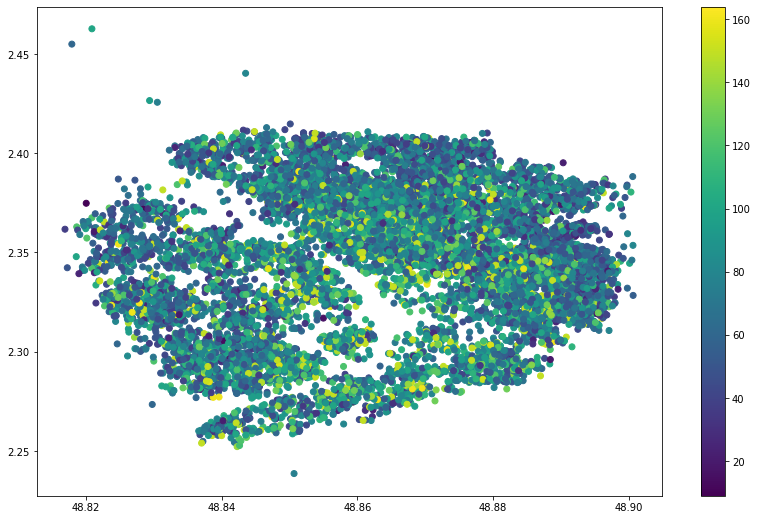

In [39]:
# plotar os imóveis pela latitude-longitude no dataset II
fig, ax = plt.subplots(figsize=(14,9))
mapa = ax.scatter(x='latitude', y='longitude', c='price', data=df_clean365)
fig.colorbar(mapa)
plt.show()

## Conclusões


Nesse *notebook*, fizemos um extenso levantamento estatístico acerca das locações do Airbnb na cidade de Paris, na França. 

Percebemos que 69,9% das locações permitem o aluguéis de até 30 dias, visando, nesse caso, o aluguel por turistas, enquanto 28,5% dos dados têm aluguel mínimo de 1 ano, oferecendo, portanto, uma moradia permanente.

No primeiro conjunto de locações, percebemos que as mais caras tendem a ficar próximas ao Rio Sena; por outro lado, as locações mais periféricas tendem a ser mais baratas.

Finalmente, concluímos que essa análise tem caráter preliminar, mas ainda assim pode servir para uma primeira observação das informações. Para um estudo mais detalhado, podemos usar os *datasets* mais completos, também disponíveis em [Inside Airbnb](http://insideairbnb.com/get-the-data.html).